# BATDOG <a class="tocSkip">

### *The <font color=red>B</font>ayesian <font color=red>A</font>s<font color=red>t</font>rometric <font color=red>D</font>ust Cart<font color=red>og</font>rapher* <a class="tocSkip">

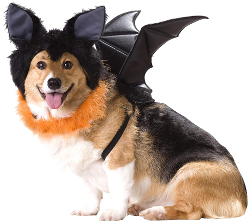

**A Python notebook for processing of parallaxes, comparison with variable star distances and inference of line of sight interstellar extinction to said variable stars.**

This notebook was developed with Table of Contents 2, a Jupyter notebook extension that makes navigating between sections of the code significantly easier. It is strongly recommended that you install this extension. Some details about how to do this can be found here: https://ndres.me/post/best-jupyter-notebook-extensions/ (remember to restart Jupyter after installing nbextensions)

------

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports-and-dependencies" data-toc-modified-id="Imports-and-dependencies-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports and dependencies</a></span></li><li><span><a href="#Loading-of-data" data-toc-modified-id="Loading-of-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading of data</a></span><ul class="toc-item"><li><span><a href="#Creation-of-PLR-relation-class" data-toc-modified-id="Creation-of-PLR-relation-class-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Creation of PLR relation class</a></span></li><li><span><a href="#Setup-of-a-fake-distribution" data-toc-modified-id="Setup-of-a-fake-distribution-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Setup of a fake distribution</a></span></li><li><span><a href="#Assigning-stellar-parameters-to-the-distribution" data-toc-modified-id="Assigning-stellar-parameters-to-the-distribution-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Assigning stellar parameters to the distribution</a></span></li><li><span><a href="#Sampling-experimental-values" data-toc-modified-id="Sampling-experimental-values-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Sampling experimental values</a></span></li></ul></li><li><span><a href="#Setup-of-likelihood-&amp;-priors" data-toc-modified-id="Setup-of-likelihood-&amp;-priors-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Setup of likelihood &amp; priors</a></span><ul class="toc-item"><li><span><a href="#Priors" data-toc-modified-id="Priors-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Priors</a></span><ul class="toc-item"><li><span><a href="#Prior-on-extinction" data-toc-modified-id="Prior-on-extinction-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Prior on extinction</a></span></li><li><span><a href="#Prior-on-parallax" data-toc-modified-id="Prior-on-parallax-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Prior on parallax</a></span></li><li><span><a href="#Prior-on-parallax-offset" data-toc-modified-id="Prior-on-parallax-offset-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Prior on parallax offset</a></span></li><li><span><a href="#Prior-on-scale-length" data-toc-modified-id="Prior-on-scale-length-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Prior on scale length</a></span></li><li><span><a href="#Logarithmic-priors-combination" data-toc-modified-id="Logarithmic-priors-combination-3.1.5"><span class="toc-item-num">3.1.5&nbsp;&nbsp;</span>Logarithmic priors combination</a></span></li></ul></li><li><span><a href="#Likelihood-function" data-toc-modified-id="Likelihood-function-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Likelihood function</a></span><ul class="toc-item"><li><span><a href="#Likelihood-of-parallax-data" data-toc-modified-id="Likelihood-of-parallax-data-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Likelihood of parallax data</a></span></li><li><span><a href="#Likelihood-of-extinction-data" data-toc-modified-id="Likelihood-of-extinction-data-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Likelihood of extinction data</a></span></li><li><span><a href="#Likelihood-of-absolute-magnitude-data" data-toc-modified-id="Likelihood-of-absolute-magnitude-data-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Likelihood of absolute magnitude data</a></span></li><li><span><a href="#Likelihood-of-apparent-magnitude-data" data-toc-modified-id="Likelihood-of-apparent-magnitude-data-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Likelihood of apparent magnitude data</a></span></li><li><span><a href="#Probability-of-the-nuisance-magnitude-parameters" data-toc-modified-id="Probability-of-the-nuisance-magnitude-parameters-3.2.5"><span class="toc-item-num">3.2.5&nbsp;&nbsp;</span>Probability of the nuisance magnitude parameters</a></span></li><li><span><a href="#Logarithmic-likelihoods-combination" data-toc-modified-id="Logarithmic-likelihoods-combination-3.2.6"><span class="toc-item-num">3.2.6&nbsp;&nbsp;</span>Logarithmic likelihoods combination</a></span></li></ul></li><li><span><a href="#Posterior" data-toc-modified-id="Posterior-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Posterior</a></span></li></ul></li><li><span><a href="#Creation-of-a-starting-guess" data-toc-modified-id="Creation-of-a-starting-guess-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Creation of a starting guess</a></span><ul class="toc-item"><li><span><a href="#Define-a-maximisation-function" data-toc-modified-id="Define-a-maximisation-function-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Define a maximisation function</a></span><ul class="toc-item"><li><span><a href="#Cheeky-plot-testing-of-parameter-space" data-toc-modified-id="Cheeky-plot-testing-of-parameter-space-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Cheeky plot testing of parameter space</a></span></li></ul></li><li><span><a href="#Set-initial-expected-hyperparameter-guesses" data-toc-modified-id="Set-initial-expected-hyperparameter-guesses-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Set initial expected hyperparameter guesses</a></span></li><li><span><a href="#Run-the-maximisation-function-for-all-stars" data-toc-modified-id="Run-the-maximisation-function-for-all-stars-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Run the maximisation function for all stars</a></span></li><li><span><a href="#Export-the-starting-guesses-into-a-(checked)-set-of-dimensions-guesses" data-toc-modified-id="Export-the-starting-guesses-into-a-(checked)-set-of-dimensions-guesses-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Export the starting guesses into a (checked) set of <em>dimensions</em> guesses</a></span></li></ul></li><li><span><a href="#Running-of-emcee" data-toc-modified-id="Running-of-emcee-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Running of emcee</a></span><ul class="toc-item"><li><span><a href="#Define-an-emcee-running-function" data-toc-modified-id="Define-an-emcee-running-function-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Define an emcee running function</a></span></li><li><span><a href="#Define-plotting-functions" data-toc-modified-id="Define-plotting-functions-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Define plotting functions</a></span></li><li><span><a href="#Initialise-emcee-and-try-a-few-first-steps" data-toc-modified-id="Initialise-emcee-and-try-a-few-first-steps-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Initialise emcee and try a few first steps</a></span></li><li><span><a href="#Run-emcee-for-reals-and-check-output" data-toc-modified-id="Run-emcee-for-reals-and-check-output-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Run emcee <em>for reals</em> and check output</a></span></li></ul></li><li><span><a href="#Data-saving-and-plotting" data-toc-modified-id="Data-saving-and-plotting-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Data saving and plotting</a></span><ul class="toc-item"><li><span><a href="#Function-for-computing-sample-quantiles" data-toc-modified-id="Function-for-computing-sample-quantiles-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Function for computing sample quantiles</a></span></li><li><span><a href="#Compare-between-true-&amp;-inferred-values" data-toc-modified-id="Compare-between-true-&amp;-inferred-values-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Compare between true &amp; inferred values</a></span></li></ul></li><li><span><a href="#Deprecated-code" data-toc-modified-id="Deprecated-code-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Deprecated code</a></span><ul class="toc-item"><li><span><a href="#From-the-maximisation-function" data-toc-modified-id="From-the-maximisation-function-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>From the maximisation function</a></span></li></ul></li></ul></div>

# Imports and dependencies
------

Specify directories

In [140]:
# Directory where we can find data for plotting
data_dir = 'data/'

Import packages

In [141]:
# Packages you probably have:
import numpy as np
from scipy.optimize import minimize  # for some data loading shiz
from scipy.stats import norm
import pandas as pd
import sys
import matplotlib.pyplot as plt
#import progressbar  # for timing MCMC running

# Packages you might not have:
import emcee
import corner  # for plots later

# Local .py files that should be in the same dir as this notebook:
# <none>

# Loading of data
------

## Creation of PLR relation class
We define a PLR relation class with a number of useful methods. Each instance stores its own PLR parameters.

In [142]:
class PLR:
    # Dependencies
    import numpy as np
    
    def __init__(self):
        """Create a, b dictionaries local to each instance for storing 
        PLR parameters.
        """
        self.a = {}
        self.b = {} 
        
    def check_is_list(self, test):
        """Little function for making things lists if they aren't already."""
        if type(test) is not list or np.ndarray:
            return [test]
        else:
            return test
    
    def set_band(self, new_a, new_b, band='default'):
        """Sets the specified band. Defaults to setting it for a single 
        default band. It is entirely possible to pass a list of bands to 
        this method for easy assignment.
        """
        # Typecast inputs as lists if necessary so we can iterate over them
        band = self.check_is_list(band)
        new_a = self.check_is_list(new_a)
        new_b = self.check_is_list(new_b)
               
        # Iterate over input bands and set a, b.
        for a_band, a_new_a, a_new_b in zip(band, new_a, new_b):      
            self.a[a_band] = float(a_new_a)
            self.b[a_band] = float(a_new_b)
    
    def read_band_a(self, band='default'):
        """Reads the specified band a value back to the user."""
        return self.a[band]
    
    def read_band_b(self, band='default'):
        """Reads the specified band b value back to the user."""
        return self.b[band]
    
    def list_of_bands(self):
        """Returns a list of currently loaded bands in a.
        It is assumed that self.a and self.b will always have the same keys,
        at least for proper assignment with the class' set_band method.
        """
        return list(self.a.keys())
        
    # The following are applications of the Leavitt law.
    def magnitude(self, period, band='default'):
        """Returns the apparent magnitude of a variable given a period."""
        return self.a[band] * (np.log10(period) - 1) + self.b[band]
    
    def period(self, magnitude, band='default'):
        """Returns the period of a variable given an apparent magnitude."""
        return np.power(10, (magnitude - self.b[band]) / self.a[band] + 1)

## Setup of a fake distribution
Create a fake data distribution, fuck with it, and go from there.
Try to sample stars from a unifrom density:

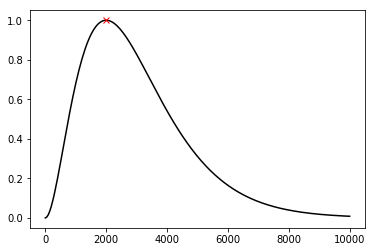

In [143]:
def true_parallax(r):
    """Returns what the exact true parallax 
    should be in arcsecs for a given r."""
    return 1.0/r
    

def stellar_distribution(r, L, fact=1):
    """Returns pdf of a decreasing volume density distribution.
    L    = scale length
    fact = in case we need the -ve of the function and as a 
           factor too to normalise it
    """
    return fact/(2*L**3) * r**2 * np.exp(-r/L)


# Set some parameters
N = 100  # number of stars
N_bands = 1  # number of bands
scale = 1000  # scale factor in pc to apply, roughly half the mode of the pdf

# Work out the maximum of our distribution
pdf_max_x = scale * 2
pdf_max_y = stellar_distribution(pdf_max_x, scale)

# Normalise the distribution to have its max at 1 for sampling
factor = 1.0 / pdf_max_y 

# Quick test of the distribution
hi = np.linspace(0, scale*10, num=200)
plt.plot(hi, stellar_distribution(hi, scale, fact=factor), 'k-')
plt.plot([pdf_max_x], stellar_distribution(pdf_max_x, scale, 
                                           fact=factor), 'rx')
plt.show()

Let's sample the real location of the stars

In [144]:
# Use a defined random start number for repeatability
rng = np.random.RandomState(42)

# Some names for star samples, currently just consecutive integers
sampled_ids = pd.Series(list(range(0, N)))

# A pandas DataFrame for all true and experimental data
data = pd.DataFrame(sampled_ids, columns=['ID'])

# Assign a random ra and dec to every star
data['ra'] = pd.Series(np.random.rand(N) * 360)
data['dec'] = pd.Series((np.random.rand(N) - 0.5)*180)

# Sample stellar_distribution to assign distance values to each star
i = 0
r_true = np.zeros(N)
while i < N:
    # Create a test r of size 13 times that of the scale and a deviate test_p 
    # to compare with the interval
    test_r = np.random.rand() * scale * 13
    test_p = np.random.rand()
    
    # See if the test point is in the distribution or not
    if test_p < stellar_distribution(test_r, scale, fact=factor):
        r_true[i] = test_r
        i += 1

# Assign r and implied parallax values we've got to the data frame
data['r_true'] = pd.Series(r_true)
data['omega_true'] = pd.Series((1 / r_true)*1e3)

## Assigning stellar parameters to the distribution
Let's make two PL relations to use; a real one and an experimentally derived one.

In [145]:
real_PLR = PLR()
real_PLR.set_band(-2.7, 3.0)

test_PLR = PLR()
test_PLR.set_band(-2.7, 3.0)

Use the PL relation to infer values for things like magnitude and luminosity.

In [146]:
# Calculate PLR parameters - a period, scatter and absolute magnitude
# Periods between 5 to 20 days. Normal scatter of s.d. 0.4 mag.
dispersion_guess = 0.4
data['P_true'] = pd.Series((20-5)*np.random.rand(N) + 5)

#################################################### MULT BY 0
data['s_true'] = pd.Series(0*np.random.normal(loc=0, scale=dispersion_guess, 
                                            size=N))
data['M_true'] = pd.Series(real_PLR.magnitude(data['P_true']) + data['s_true'])

# Make up an extinction and pull out an implied apparent magnitude
data['A_true'] = pd.Series((2-0.2)*np.random.rand(N) + 0.2)
data['m_true'] = (pd.Series(data['M_true'] + 5*np.log10(data['r_true'] / 10)) 
                  + data['A_true'])

## Sampling experimental values

Now, let's sample some experimental values. **TODO: define an $r^2e^{-r}$ function to act as a model of the distribution of fractional errors on parameters:**

In [147]:
def error_distribution(value, max_error, min_error):
    """Currently just pulls out a random number *roughly* 
    between max_error and min_error.
    """
    random_numbers = (np.random.rand(value.size) * (max_error - min_error) 
                      + min_error)
    return value * random_numbers

Next, we want to mess with all of our true values and generate some experimental ones to play with.

In [148]:
# Use a defined start number for repeatability.
rng = np.random.RandomState(142)

def parallax_error_estimator(magnitude, N):
    """Models parallax error according to Gaia collaboration 
    2018 - Summary of contents & survery properties
    - - - - - - - - - - 
     m   sigma_omega [mas]
    <15  0.02-0.04
     17  0.10
     20  0.70
     21  2.00
    """
    # Always 0.02 below 11
    magnitude = np.where(magnitude <= 11, 0.02, 
                         magnitude)
    
    # Make it big for over 21
    magnitude =  np.where(magnitude > 21, 2 * (magnitude-20), 
                          magnitude)
    
    # Linear between 0.7 at 20, 2.0 at 21
    magnitude = np.where(magnitude > 20, 1.3 * (magnitude-20) + 0.70, 
                         magnitude)
    
    # Linear between 0.1 at 17, 0.7 at 20
    magnitude = np.where(magnitude > 17, 0.20 * (magnitude-17) + 0.10, 
                         magnitude)
    
    # Linear between 0.04 at 15, 0.1 at 17
    magnitude = np.where(magnitude > 15, 0.03 * (magnitude-20) + 0.04, 
                         magnitude)
    
    # Linear between 0.02 at 11, 0.04 at 15
    magnitude = np.where(magnitude > 11, 0.005 * (magnitude-20) + 0.02, 
                         magnitude)
    
    # Add a bit of random error & return
    return magnitude * np.random.normal(loc=1, scale=0.2, size=N)


"""Parallax"""
omega_0 = -0.0  # in mas
parallax_errors = parallax_error_estimator(data['m_true'], N) / 5 ################## BIG DIVISION HERE
data['omega_exp'] = (data['omega_true'] + np.random.normal(loc=0, scale=1, 
                                                           size=N) 
                     * parallax_errors + omega_0)
data['omega_sigma'] = np.abs(parallax_errors)

"""Apparent magnitude (uncorrected for extinction) & extinction estimates"""
# Typical errors from Scowcroft 2016 - typical 0.1-0.2%
app_magnitude_errors = (data['m_true'] 
                        * np.random.normal(loc=0, scale=0.001, size=N))
data['m_exp'] = data['m_true'] + app_magnitude_errors + data['s_true']
data['m_sigma'] = np.sqrt(np.abs(app_magnitude_errors)**2 + 0.001**2)
data['A_exp'] = data['A_true'] * ((0.9-0.5)*np.random.rand(N) + 0.5)
data['A_sigma'] = 0.8 * data['A_exp']   # 80% error on all

"""Period"""
# Typical 1-2% P error
period_errors = data['P_true'] * np.random.normal(loc=0, scale=0.015, size=N)
data['P_exp'] = data['P_true'] + period_errors
data['P_sigma'] = np.sqrt(np.abs(period_errors)**2 + 0.01**2)

"""Inferred absolute magniture from the test PLR"""
### THIS CURRENTLY JUST USES INPUT ERROR - needs knowledge of relationship error also
# We are assuming that the scatter is much greater than the period error
# to justify M being treated as a Gaussian deviate.
data['M_exp'] = pd.Series(test_PLR.magnitude(data['P_exp']) + data['s_true'])
data['M_sigma'] = pd.Series(np.sqrt(
            (test_PLR.read_band_a() * data['P_sigma']/data['P_exp'] 
             * np.log(data['P_exp']))**2 
            + (0 * test_PLR.read_band_b())**2
            + (0 * dispersion_guess)**2))

# """Inferred radii from the test PLR"""
# data['r_exp'] = np.power(10, (data['m_exp'] 
#                              - data['M_exp']) / 5 + 1)
# data['r_exp_u'] = np.power(10, (data['m_exp'] + data['m_sigma']
#                                - data['M_sigma']) / 5 + 1)
# data['r_exp_l'] = np.power(10, (data['m_exp'] - data['m_sigma']
#                                + data['M_sigma']) / 5 + 1)

# Output some data so far to look at what our results are like
data[['m_true', 'omega_true', 'omega_exp', 'omega_sigma']]

,m_true,omega_true,omega_exp,omega_sigma
0,15.060395,0.565516,0.581627,0.022650
1,15.673801,0.750959,0.765102,0.025690
2,16.640238,0.215590,0.201886,0.013749
3,13.386440,1.446793,1.448553,0.002744
4,16.834897,0.321020,0.328801,0.007849
5,13.780657,0.673586,0.673311,0.002670
6,12.032724,1.329527,1.326279,0.003666
7,17.944547,0.173344,0.277987,0.059977
8,16.486171,0.471197,0.466153,0.017408
9,16.387685,0.464097,0.472568,0.015461


# Setup of likelihood & priors
------

**N.B. everything here returns the result of a log.**

## Priors
### Prior on extinction
This is simply a uniform prior to constrain the extinction co-efficient to something reasonable.

In [149]:
def prior_extinction(params, r, debug):
    """Currently, a uniform prior between a reasonable range for an 
    extinction co-efficient."""
    # Constants
    max_extinction = 5.0
    min_extinction = 0.0
    
    # Set any incorrect range extinctions to -np.inf (log of 0) and return A
    answer = np.where(np.logical_or(params[r['A']] < min_extinction, 
                                    params[r['A']] > max_extinction), 
                      -np.inf, 0)
    
    # Debug - check for infinities
    if debug:
        if np.all(np.isfinite(answer)) == False:
            print("\nprior_extinction encountered infs in:")
            print(np.where(np.isfinite(answer) == False))
    
    return answer

### Prior on parallax
*Parallax is extremely dangerous. We must deal with it!* The following computes the parallax prior, which is effectively our distance prior but flipped around a bit.

In [150]:
def prior_parallax(params, r, debug):
    """The distance prior but in terms of parallax. We check for any cheeky 
    parallaxes less than zero and set them to -np.inf; if not, set to 
    distance prior.
    """
    # Apply distance prior
    answer = np.where(params[r['omega']] < 0, -np.inf, 
                      np.log(1/(2 * params[r['L']]**3 * params[r['omega']]**2)) 
                      - 1 / (params[r['omega']] * params[r['L']]))
    
    # Debug - check for infinities
    if debug:
        if np.all(np.isfinite(answer)) == False:
            print("\nprior_parallax encountered infs in:")
            print(np.where(np.isfinite(answer) == False))
    
    return answer

### Prior on parallax offset
A uniform prior to constrain $\omega_0$ to a reasonable value.

In [151]:
def prior_parallax_offset(params, r, debug):
    """A uniform prior in a defined reasonable range for omega_0."""
    # Constants (in mas)
    max_omega_0 = 0.001
    min_omega_0 = -0.001
    
    # Check if we're in the correct range
    if (params[r['omega_0']] <= max_omega_0 
        and params[r['omega_0']] >= min_omega_0):
        answer = 0
    else:
        answer = -np.inf
    
    # Debug - check for infinities
    if debug:
        if np.all(np.isfinite(answer)) == False:
            print("\nprior_parallax_offset encountered infs in:")
            print(np.where(np.isfinite(answer) == False))
    
    return answer

### Prior on scale length
A uniform prior within sensible values.

In [152]:
def prior_scale(params, r, debug):
    """A uniform prior defined in a reasonable range for L."""
    # Constants
    max_scale = 1200
    min_scale = 800
    
    # Check if we're in the correct range
    if (params[r['L']] <= max_scale 
        and params[r['L']] >= min_scale):
        answer = 0
    else:
        answer = -np.inf
    
    # Debug - check for infinities
    if debug:
        if np.all(np.isfinite(answer)) == False:
            print("\nprior_scale encountered infs in:")
            print(np.where(np.isfinite(answer) == False))
    
    return answer

### Logarithmic priors combination

In [153]:
def prior_total(params, r, debug):
    """Sums all of the priors. Convenience function!"""
    return (np.sum(prior_extinction(params, r, debug))
            + np.sum(prior_parallax(params, r, debug))
            + prior_parallax_offset(params, r, debug)
            + prior_scale(params, r, debug))
    

## Likelihood function
Parts of the likelihood fn are defined here.

### Likelihood of parallax data

In [154]:
def likelihood_parallax(params, r, data, debug):
    """Returns a normal distribution evaluated at the measured Gaia parallax 
    value, with:
    
    mean = the inferred parallax value plus the Gaia zero-point offset
    standard deviation = the error on the Gaia parallax value
    """
    # Pull parallax likelihood from our normal distribution
    answer = np.log(norm(params[r['omega']] + params[r['omega_0']], 
                         data['omega_sigma']).pdf(data['omega_exp']))
    
    # Debug - check for infinities
    if debug:
        if np.all(np.isfinite(answer)) == False:
            print("\nlikelihood_parallax encountered infs in:")
            print(np.where(np.isfinite(answer) == False))
    
    return answer

### Likelihood of extinction data

In [155]:
def likelihood_extinction(params, r, data, debug):
    """Returns a normal distribution evaluated at the measured extinction 
    value, with:
    
    mean = the measured extinction value
    standard deviation = the error on the extinction value
    """
    # Pull extinction likelihood from our normal distribution
    answer = np.log(norm(params[r['A']], data['A_sigma']).pdf(data['A_exp']))
    
    # Debug - check for infinities
    if debug:
        if np.all(np.isfinite(answer)) == False:
            print("\nlikelihood_extinction encountered infs in:")
            print(np.where(np.isfinite(answer) == False))
    
    #return answer
    return 0

### Likelihood of absolute magnitude data

In [156]:
def likelihood_abs_mag(params, r, data, debug):
    """This currently assumes the absolute magnitude is normally distributed.
    IT IS NOT.
    This should be changed later :)
    """
    # Pull likelihood from normal distribution
    answer = np.log(norm(params[r['M']], data['M_sigma']).pdf(data['M_exp']))
    
    # Debug - check for infinities
    if debug:
        if np.all(np.isfinite(answer)) == False:
            print("\nlikelihood_abs_mag encountered infs in:")
            print(np.where(np.isfinite(answer) == False))
    
    return answer

### Likelihood of apparent magnitude data

In [157]:
def likelihood_app_mag(params, r, data, debug):
    """This currently assumes the apparent magnitude is normally distributed.
    IT IS NOT.
    This should be changed later :)
    """
    app_mag_error = np.sqrt(data['m_sigma']**2)# + data['A_sigma']**2)
    
    distribution = norm(params[r['M']] + params[r['A']] + 10 
                        - 5 * np.log10(params[r['omega']])
                        , app_mag_error).pdf(np.array(data['m_exp']))
    
    # Only take a log when distribution isn't gonna make it be infinity
    # This catches a common warning message
    answer = np.where(distribution > 1e-320, np.log(distribution), -np.inf)
    
    """
    print("data mags: {}".format(np.array(data['m_exp'])))
    print("mags: {}".format(params[r['M']]))
    print("exts: {}".format(params[r['A']]))
    print("log om: {}".format(np.log10(params[r['omega']])))
    print("\ninput: {}".format(params[r['M']] + params[r['A']] + 10 - 5 
                             * np.log10(params[r['omega']])))
    print("dist: {}".format(distribution))
    print("answer: " + str(answer))
    """
    
    # Debug - check for infinities
    if debug:
        if np.all(np.isfinite(answer)) == False:
            print("\nlikelihood_app_mag encountered infs in:")
            print(np.where(np.isfinite(answer) == False))

    return answer

### Probability of the nuisance magnitude parameters

In [158]:
def likelihood_nuisance(params, r, debug):
    """Currently just a test that both the apparent and absolute magnitudes
    are within reasonable ranges.
    """
    # Constants
    max_M = 0
    min_M = 7
    max_m = 5
    min_m = 25
    
    # Test apparent and absolute magnitudes
    test_M = np.logical_or(params[r['M']] < max_M, params[r['M']] > min_M)
    test_m = np.logical_or(params[r['m']] < max_m, params[r['m']] > min_m)
    answer = np.where(np.logical_or(test_M, test_m), -np.inf, 0)
    
    # Debug - check for infinities
    if debug:
        if np.all(np.isfinite(answer)) == False:
            print("\nlikelihood_nuisance encountered infs in:")
            print(np.where(np.isfinite(answer) == False))
    
    return answer

### Logarithmic likelihoods combination

In [159]:
def likelihood_total(params, ranges, data, debug):
    """Sums all of the likelihood functions. Convenience function!"""
    return (np.sum(likelihood_parallax(params, ranges, data, debug))
            + np.sum(likelihood_extinction(params, ranges, data, debug))
            + np.sum(likelihood_abs_mag(params, ranges, data, debug))
            + np.sum(likelihood_app_mag(params, ranges, data, debug))
            + np.sum(likelihood_nuisance(params, ranges, debug)))

## Posterior
The last prep step! This function defines our log posterior.

In [160]:
def posterior(params, ranges, data, debug=False):
    """Sums all of the logarithmic likelihoods and priors."""
    return (likelihood_total(params, ranges, data, debug) 
            + prior_total(params, ranges, debug))

# Creation of a starting guess
------

For any decent number of stars, the model has a huge number of dimensions. To improve the convergence time of the model, we can use function minimisation methods for each individual star and some intuition with hyperparameters to have a guess that's at a good initial probability.

## Define a maximisation function

In [161]:
def maximise_parallax_likelihood(omega, omega_0, L, A, m, M, ranges, data):
    
        
    return omega_success, omega

In [162]:
def maximise_likelihood(star, data, omega_0, L):
    """Maximises a given star's likelihood in order to find a good initial 
    guess at its parameters.
    
    Currently, this takes omega, omega_0, L, m and M values as given, and only 
    fits for A. This has, in the past, stopped the minimisation function
    from being a colossal prick
    
    If the function fails for whatever reason (usually because it can't stop 
    getting -np.inf for a given star,) then success will be set to False and 
    the star will not be added to the parameters to solve for. If this happens, 
    then the user should really try and work out why (and get the star working)
    before proceeding, to ensure that selection effects stemming from the
    effectiveness of this guesser do not appear in the final model.
    """
    # Console output
    print("\n> Creating a guess for star {}".format(star))
    
    # Assume failure because I have to typecast this.. somewhere. Why not here?
    A_success = False
    
    # A synthetic ranges dictionary to trick posterior() into working
    ranges = {'omega':0,
              'omega_0':1,
              'L':2,
              'A':list(range(3, 3 + 1*N_bands)),
              'm':list(range(3 + 1*N_bands, 3 + 2*N_bands)),
              'M':list(range(3 + 2*N_bands, 3 + 3*N_bands))}
    
    # Create other guess parameters
    A = data['A_exp'][a_star]
    m = data['m_exp'][a_star]
    M = data['M_exp'][a_star] 
    
    
    """Solve for parallax"""
    # We calculate good input data for scipy, and then feed this to the
    # minimisation method.
    def function_to_minimize(omega, omega_0, L, A, m, M, ranges, data):
        """Minimisation function for use with scipy. We multiply by -1 so 
        we're minimising, not maximising!
        """
        # Pop everything in a np.array to interface with existing fns
        params = np.array([omega, omega_0, L, A, m, M])

        return -1*(np.sum(likelihood_parallax(params, ranges, data, True)) 
                   + np.sum(prior_parallax(params, ranges, True)))
    
    # Calculate different initial estimates of the parallax & their probability
    omega_exp = data['omega_exp']
    omega_PLR = np.power(10, (data['M_exp'][a_star] + data['A_exp'][a_star] 
                                  + 10 - data['m_exp'][a_star]) / 5)
    omega_prior = 1/(2*L) * 1e3
    prob_exp = function_to_minimize(omega_exp, omega_0, L, 
                                    A, m, M, ranges, data)
    prob_PLR = function_to_minimize(omega_PLR, omega_0, L, 
                                    A, m, M, ranges, data)
    prob_prior = function_to_minimize(omega_prior, omega_0, L, 
                                      A, m, M, ranges, data)
    
    # Minimise with the most likely 
    if prob_exp < prob_PLR and prob_exp < prob_prior and np.isfinite(prob_exp):
        print("    using experimental parallax value for first guess")
        omega = omega_exp
        omega_success = True
    elif prob_PLR < prob_prior and np.isfinite(prob_PLR):
        print("    using PLR parallax value for first guess")
        omega = omega_PLR
        omega_success = True
    elif np.isfinite(prob_prior):
        print("    using prior parallax value for first guess")
        omega = omega_prior
        omega_success = True
        
    # If all else fails, brute force through parameter space to try and find
    # a value to use. Ranges need setting manually.
    else:
        print("    ah shit nothing has worked yet")
        print("    gonna do this the hard way with 1000 samples...")
        omega_sampled = np.linspace(0.001, 2.0, num=1000)
        prob_sampled = []
        for i in omega_sampled:
            params = np.array([i, 0.0, 1000.0, 0.0, 0.0, 0.0])
            prob_sampled.append(function_to_minimize(i, omega_0, L, 
                                                     A, m, M, ranges, data))
        
        # See if *literally any* of the values are good
        if np.any(np.isfinite(prob_sampled)):
            print("    using sampled parallax value for first guess")
            index_of_minimum = np.argmin(prob_sampled)
            omega = omega_sampled[index_of_minimum]
            omega_success = True
        else:
            print("~~~ failed to make initial omega guess =(")
            omega_success = False
        
    # Minimise with scipy if the above worked and we have a good initial guess
    if omega_success:
        result = minimize(function_to_minimize, omega, 
                          args=(omega_0, L, A, m, M, ranges, data), 
                          method='Nelder-Mead',
                          options={'maxiter':2000, 'disp':True})
    
        # Pull the results out of result, which is a 
        # scipy.optimize.OptimizeResult object that needs care, love, 
        # attention, and the US spelling of optimise
        omega_success = result.success

        # Tell the user that everything went well (hopefully (maybe))
        if omega_success:
            omega_guess = result.x
            print("    guessed omega at {}".format(omega_guess))
        else:
            print("~~~ scipy failed to guess omega =(")
    
    
    """Solve for extinction"""
    # This is easily done with the PLR relationship and using the guessed
    # parallax above to infer an extinction value.
    if omega_success:
        A_guess = m - M - 10 + 5*np.log10(omega_guess)
        print("    guessed A at {}".format(A_guess))
        print("    original A was {}".format(data['A_exp'][star]))
        
        # Check that the posterior for this star isn't something stupid
        # If it is, then we've fucked up lol
        params_guess = np.array([omega_guess, omega_0, L, A_guess, m, M])
        posterior_guess = posterior(params_guess, ranges, data, debug=True)
        A_success = np.isfinite(posterior_guess)
        print("    posterior evaluates to {}".format(posterior_guess))
        
        if A_success == False:
            print("~~~ failed to guess A due to poor posterior")   
    
    
    """Return result"""
    if A_success:
        print("    storing this good result for star {}".format(star))
        return [omega_guess, A_guess, m, M]
        
    else:
        print("~~~ star {} will not be stored in the final model".format(star))
        return [False]

### Cheeky plot testing of parameter space

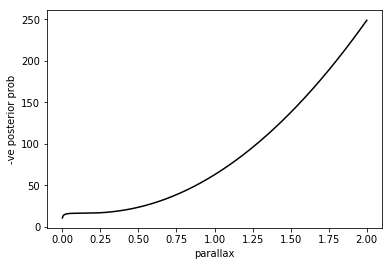

In [172]:

ranges = {'omega':0,
          'omega_0':1,
          'L':2,
          'A':list(range(3, 3 + 1*N_bands)),
          'm':list(range(3 + 1*N_bands, 3 + 2*N_bands)),
          'M':list(range(3 + 2*N_bands, 3 + 3*N_bands))}

a_star = 33

##############

some_data = data.iloc[[a_star]]
a_A = some_data['A_exp'][a_star]
a_m = some_data['m_exp'][a_star]
a_M = some_data['M_exp'][a_star]

xrange = np.linspace(0.001, 2.0, num=1000)
yrange = []
for i in xrange:
    params = np.array([i, 0.0, 1000.0, 0.0, 0.0, 0.0])
    yrange.append(-1*(np.sum(likelihood_parallax(params, ranges, some_data, True)) 
                   + np.sum(prior_parallax(params, ranges, True))))
    
plt.plot(xrange, yrange, 'k-')
plt.xlabel('parallax')
plt.ylabel('-ve posterior prob')
plt.show()


In [173]:
guess_fails

[33, 72]

In [174]:
some_data

,ID,ra,dec,r_true,omega_true,P_true,s_true,M_true,A_true,m_true,omega_exp,omega_sigma,m_exp,m_sigma,A_exp,A_sigma,P_exp,P_sigma,M_exp,M_sigma
33,33,287.571711,35.111172,5994.757301,0.166812,9.272023,-0.0,3.088629,1.418207,18.395694,0.230964,0.082878,18.41105,0.015389,0.714357,0.571486,9.125713,0.146651,3.10728,0.095938


## Set initial expected hyperparameter guesses

In [166]:
guess_omega_0 = 0.0
guess_L = 1000

## Run the maximisation function for all stars

In [167]:
# Define ranges that will be where data is stored in the overall
# mcmc position vector.

guess_omega = []
guess_A = []
guess_m = []
guess_M = []
guess_successes = []
guess_fails = []

# Cycle over all stars and get guesses on their parameters
for a_star in range(N):
    maximisation_result = maximise_likelihood(a_star, data.iloc[[a_star]],
                                              guess_omega_0, guess_L)
    
    # Only add the star to the parameter set if it's not going to cause issues.
    # We ascertain this with np.any(), which returns False for [False] (as the 
    # single array element in that isn't true)
    if np.any(maximisation_result):
        guess_omega.append(maximisation_result[0])
        guess_A.append(maximisation_result[1])
        guess_m.append(maximisation_result[2])
        guess_M.append(maximisation_result[3])
        guess_successes.append(a_star)
    else:
        guess_fails.append(a_star)

print('All done! We failed {} times.'.format(len(guess_fails)))


> Creating a guess for star 0
    using experimental parallax value for first guess
Optimization terminated successfully.
         Current function value: 17.462566
         Iterations: 10
         Function evaluations: 20
    guessed omega at [0.57986574]
    guessed A at [1.08599221]
    original A was 0.8896045984425304
    posterior evaluates to -10.334307268996515
    storing this good result for star 0

> Creating a guess for star 1
    using experimental parallax value for first guess
Optimization terminated successfully.
         Current function value: 18.137256
         Iterations: 10
         Function evaluations: 20
    guessed omega at [0.76338401]
    guessed A at [1.976072]
    original A was 1.5387955952605645
    posterior evaluates to -13.276337638793482
    storing this good result for star 1

> Creating a guess for star 2
    using experimental parallax value for first guess
Optimization terminated successfully.
         Current function value: 14.844119
         I

/u/h/eh594/.conda/envs/emily3/lib/python3.6/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in log



    guessed omega at [0.24915696]
    guessed A at [2.18889264]
    original A was 1.2242519253636444
    posterior evaluates to -11.069788450392316
    storing this good result for star 7

> Creating a guess for star 8
    using experimental parallax value for first guess
Optimization terminated successfully.
         Current function value: 16.757386
         Iterations: 9
         Function evaluations: 18
    guessed omega at [0.464878]
    guessed A at [1.92226384]
    original A was 1.5330862335554545
    posterior evaluates to -9.636968223249294
    storing this good result for star 8

> Creating a guess for star 9
    using experimental parallax value for first guess
Optimization terminated successfully.
         Current function value: 16.666752
         Iterations: 9
         Function evaluations: 18
    guessed omega at [0.47155286]
    guessed A at [1.31159256]
    original A was 0.7331084931731461
    posterior evaluates to -9.83673980551529
    storing this good result fo

Optimization terminated successfully.
         Current function value: 10.509467
         Iterations: 23
         Function evaluations: 46
    guessed omega at [0.00050143]
    guessed A at [-11.1951979]
    original A was 0.7143572367220545

prior_extinction encountered infs in:
(array([0]),)
    posterior evaluates to -inf
~~~ failed to guess A due to poor posterior
~~~ star 33 will not be stored in the final model

> Creating a guess for star 34
    using experimental parallax value for first guess
Optimization terminated successfully.
         Current function value: 16.286517
         Iterations: 9
         Function evaluations: 18
    guessed omega at [0.42090971]
    guessed A at [1.9548167]
    original A was 1.1749025876386152
    posterior evaluates to -10.404522161291164
    storing this good result for star 34

> Creating a guess for star 35

likelihood_parallax encountered infs in:
(array([0]),)
    using experimental parallax value for first guess
Optimization terminated 

Optimization terminated successfully.
         Current function value: 17.556038
         Iterations: 10
         Function evaluations: 20
    guessed omega at [0.69711892]
    guessed A at [1.49936081]
    original A was 0.9074466029426809
    posterior evaluates to -13.430108752040343
    storing this good result for star 61

> Creating a guess for star 62
    using experimental parallax value for first guess
Optimization terminated successfully.
         Current function value: 15.455422
         Iterations: 9
         Function evaluations: 18
    guessed omega at [0.2757178]
    guessed A at [0.50890745]
    original A was 0.31484434906427816
    posterior evaluates to -8.95072440882705
    storing this good result for star 62

> Creating a guess for star 63
    using experimental parallax value for first guess
Optimization terminated successfully.
         Current function value: 15.334695
         Iterations: 9
         Function evaluations: 18
    guessed omega at [0.28006289]
 

    using experimental parallax value for first guess
Optimization terminated successfully.
         Current function value: 16.222425
         Iterations: 9
         Function evaluations: 18
    guessed omega at [0.33155923]
    guessed A at [0.87401566]
    original A was 0.6530081631504009
    posterior evaluates to -10.777455070876172
    storing this good result for star 79

> Creating a guess for star 80
    using experimental parallax value for first guess
Optimization terminated successfully.
         Current function value: 14.837501
         Iterations: 8
         Function evaluations: 16
    guessed omega at [0.19624982]
    guessed A at [0.59852027]
    original A was 0.3379103267555543
    posterior evaluates to -9.558340529885207
    storing this good result for star 80

> Creating a guess for star 81

likelihood_parallax encountered infs in:
(array([0]),)

likelihood_parallax encountered infs in:
(array([0]),)
    using experimental parallax value for first guess
Optimiz

Optimization terminated successfully.
         Current function value: 16.735301
         Iterations: 13
         Function evaluations: 26
    guessed omega at [1.39795912]
    guessed A at [1.46902115]
    original A was 0.8696739177212992
    posterior evaluates to -10.83943525594211
    storing this good result for star 97

> Creating a guess for star 98
    using experimental parallax value for first guess
Optimization terminated successfully.
         Current function value: 17.060137
         Iterations: 9
         Function evaluations: 18
    guessed omega at [0.47793537]
    guessed A at [0.40481861]
    original A was 0.16956816999053828
    posterior evaluates to -10.29733296920159
    storing this good result for star 98

> Creating a guess for star 99
    using experimental parallax value for first guess
Optimization terminated successfully.
         Current function value: 16.218853
         Iterations: 9
         Function evaluations: 18
    guessed omega at [0.31454607]


In [178]:
data.iloc[[47]]

,ID,ra,dec,r_true,omega_true,P_true,s_true,M_true,A_true,m_true,omega_exp,omega_sigma,m_exp,m_sigma,A_exp,A_sigma,P_exp,P_sigma,M_exp,M_sigma
47,47,173.806324,-61.025872,3829.266374,0.261147,18.728441,0.0,2.264246,0.327156,15.50698,0.253377,0.018816,15.506086,0.001341,0.178841,0.143073,18.618057,0.110836,2.271177,0.047001


In [168]:
guess_fails

[33, 72]

## Export the starting guesses into a (checked) set of *dimensions* guesses

In [179]:
# Set N to a new value based on how many guesses we have
N = len(guess_omega)

# Make a ranges dictionary for our stars
ranges = {'omega':list(range(0,N)),
          'omega_0':N,
          'L':N+1,
          'A':list(range(N+2, N+2 + 1*N*N_bands)),
          'm':list(range(N+2 + 1*N*N_bands, N+2 + 2*N*N_bands)),
          'M':list(range(N+2 + 2*N*N_bands, N+2 + 3*N*N_bands))}

# Append all the guesses together
starting_guess = np.append(guess_omega, [guess_omega_0])
starting_guess = np.append(starting_guess, [guess_L])
starting_guess = np.append(starting_guess, guess_A)
starting_guess = np.append(starting_guess, guess_m)
starting_guess = np.append(starting_guess, guess_M)

# Some parameters for the MCMC simulation
dimensions = starting_guess.size
walkers = 4 * dimensions

# Extend the starting guess to our number of walkers' dimensions
rng = np.random.RandomState(42)
starting_guesses = starting_guess + 0.0001 * rng.randn(walkers, dimensions)  # SHOULD MULTIPLY BY THE DESIRED RANGE OF PARAMS

A quick check of the value of the posterior given starting_guess:

# Running of emcee
------

The game is on! It's time to run emcee and see what results we can get.

## Define an emcee running function

In [180]:
def run_emcee_for_me(sampler, steps=100, reset=False, guess=0, 
                     step_increment=1):
    """Auto-runs emcee, giving an update on each step done and 
    estimating runtime.
    """    
    # See if we need to start from a guess
    if type(guess) is int:
        # Set to last sampler position
        last_pos = sampler.chain[:, -1, :]
    else:
        # Set to the guess
        last_pos = guess
        
    # Wipe the sampler's memory if required
    if reset == True:
        sampler.reset()
    
    # A bit of start output
    sys.stdout.write("BATDOG is running!\n  steps={}\n\n".format(steps))
    sys.stdout.flush()
    
    # Loop until we reach steps
    current_step = 1
    while current_step <= steps:
        last_pos, last_prob, last_state = sampler.run_mcmc(last_pos, 
                                                           step_increment)
        sys.stdout.write("\rDone {} steps. ETA: {}"
                         .format(current_step, "W.I.P."))
        sys.stdout.flush()
        current_step += step_increment
    
    # Add a blank line at the end
    sys.stdout.write("\r                                 ")
    sys.stdout.flush()

## Define plotting functions

In [185]:
def plot_chains(sampler, star=0, fails=0, start=False):
    """Plots the current stored chain output for a given star."""
    names = list(ranges.keys())
    
    # Gets the requisite parameter numbers for a given star, correcting for
    # guess failures removing stars from the emcee model as required
    values = [ranges['omega'][0] + star - fails, 
              ranges['omega_0'], 
              ranges['L'], 
              ranges['A'][0] + star - fails, 
              ranges['m'][0] + star - fails, 
              ranges['M'][0] + star - fails]
    
    # Check if the user specified a start point to plot from
    if start != False:
        s = start
    else:
        s = 0
    
    fig, ax = plt.subplots(7, figsize=(8, 10), sharex=True)

    # Plots likelihood
    ax[0].plot(sampler.lnprobability.T, '-r', alpha=0.2)
    ax[0].set_ylabel('lnprob')

    # Plots parameter evolution
    j=0  # Parameter to try
    for i in values:
        ax[j+1].plot(sampler.chain[:, s:, values[j]].T, '-k', alpha=0.2);
        ax[j+1].set_ylabel(names[j])
        j += 1
    plt.show()
        
def plot_corner(sampler, star=0, fails=0, start=False):
    """Makes a corner plot using corner.py."""
    names = list(ranges.keys())
    
    # Gets the requisite parameter numbers for a given star, correcting for
    # guess failures removing stars from the emcee model as required
    values = [ranges['omega'][0] + star - fails, 
              ranges['omega_0'], 
              ranges['L'], 
              ranges['A'][0] + star - fails, 
              ranges['m'][0] + star - fails, 
              ranges['M'][0] + star - fails]
    
    # Check if the user specified a start point to plot from
    # CURRENTLY NOT IMPLEMENTED
    if start != False:
        s = start
        print("START VALUES AREN'T IMPLEMENTED YET HERE sorry")
    else:
        s = 0
    
    # Make a corner plot
    corner.corner(sampler.flatchain[:, values], 
                  labels=names, 
                  truths=[data['omega_true'][star], 
                          omega_0, 
                          scale, 
                          data['A_true'][star], 
                          data['m_true'][star], 
                          data['M_true'][star]],
                  quantiles=[0.16, 0.5, 0.84],
                  show_titles=True,
                  title_fmt='.4f',
                  title_kwargs={"fontsize":12},
                  scale_hist=True)
    plt.show()

## Initialise emcee and try a few first steps

In [182]:
# Define the sampler
sampler = emcee.EnsembleSampler(walkers, dimensions, posterior, 
                                args=(ranges, data.drop(guess_fails)), kwargs={'debug':False}, 
                                threads=8)

# Set random state for repeatability
sampler.random_state = rng

%time run_emcee_for_me(sampler, steps=10, guess=starting_guesses)

BATDOG is running!
  steps=10

Done 6 steps. ETA: W.I.P.

/u/h/eh594/.conda/envs/emily3/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log


Done 7 steps. ETA: W.I.P.

/u/h/eh594/.conda/envs/emily3/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log
/u/h/eh594/.conda/envs/emily3/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log
/u/h/eh594/.conda/envs/emily3/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log


Done 9 steps. ETA: W.I.P.

/u/h/eh594/.conda/envs/emily3/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log
/u/h/eh594/.conda/envs/emily3/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log
/u/h/eh594/.conda/envs/emily3/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log


                                 CPU times: user 656 ms, sys: 100 ms, total: 756 ms
Wall time: 20.3 s


/u/h/eh594/.conda/envs/emily3/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log


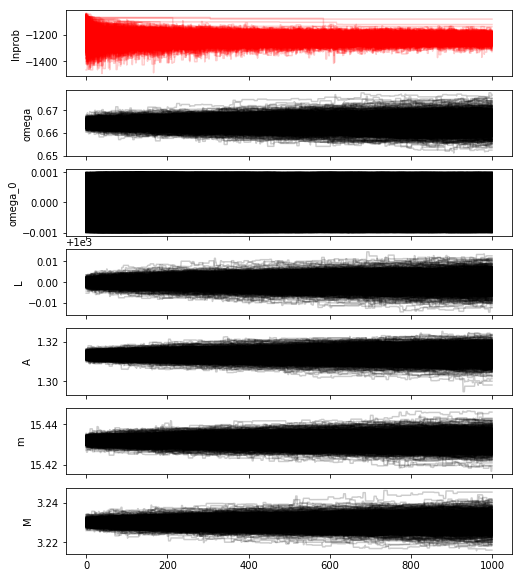

In [196]:
# Change me
star_to_try = 20

# A count of how many fails came before star_to_try that we need to account for
fails_on_try = np.count_nonzero(guess_fails < np.array([star_to_try]))

# Plot chains output
plot_chains(sampler, star=star_to_try, fails=fails_on_try)

## Run emcee *for reals* and check output

In [183]:
%time run_emcee_for_me(sampler, reset=True, steps=1000)

BATDOG is running!
  steps=1000

                                 CPU times: user 4min 59s, sys: 10min 18s, total: 15min 18s
Wall time: 50min 36s


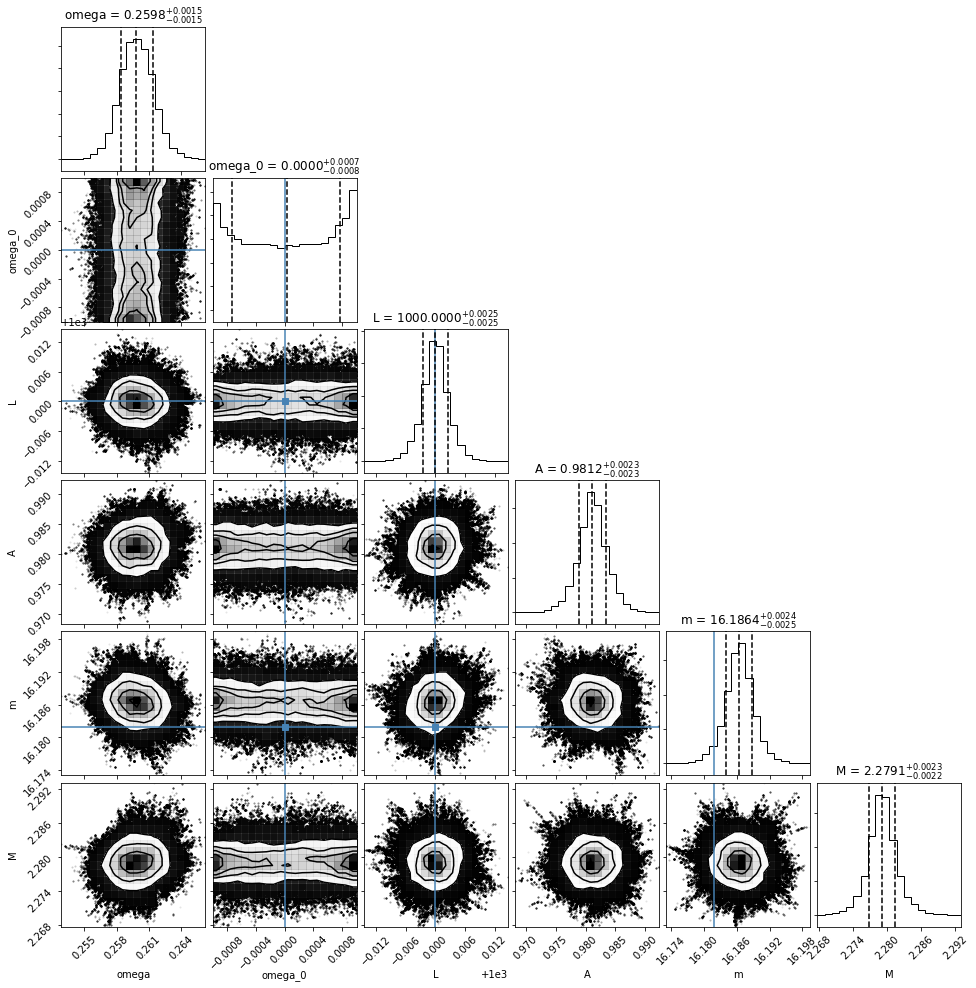

,omega_true,omega_exp,omega_sigma,m_true,m_exp,m_sigma,M_true,M_exp,M_sigma,A_true,A_exp,A_sigma
50,0.269661,0.261723,0.015562,16.181885,16.186383,0.004608,2.262977,2.279039,0.108727,1.073,0.584886,0.467908


In [197]:
# Change me
star_to_try = 50

# A count of how many fails came before star_to_try that we need to account for
fails_on_try = np.count_nonzero(guess_fails < np.array([star_to_try]))

# Make a corner plot
plot_corner(sampler, star=star_to_try, fails=fails_on_try)

# Get data on star star_to_try
data.iloc[[star_to_try]][['omega_true', 'omega_exp', 'omega_sigma', 'm_true', 
                          'm_exp', 'm_sigma', 'M_true', 'M_exp', 'M_sigma', 
                          'A_true', 'A_exp', 'A_sigma']]

In [198]:
fails_on_try

1

# Data saving and plotting
------
First, outline a way to convert back from the emcee format to a format for easy output and comparison.

## Function for computing sample quantiles

In [279]:
def calculate_corner_quantiles(sampler, start=False):
    """Computes requisite quantile levels for all parameters in the model."""
    
    quantiles = np.array([0.16, 0.50, 0.84])
    
    parameter_names = ['omega_inf', 'A_inf', 'm_inf', 'M_inf']
    
    # Initialise rows of the dataframe
    for name in parameter_names:
        data[name] = np.nan
        data[name + '_u'] = np.nan
        data[name + '_l'] = np.nan
    
    # Check if the user specified a start point to plot from
    # CURRENTLY NOT IMPLEMENTED
    if start != False:
        s = start
        print("START VALUES AREN'T IMPLEMENTED YET HERE sorry")
    else:
        s = 0
    
    # Loop over all parameters
    for star in guess_successes:
        
        # A count of how many fails came before star
        fails = np.count_nonzero(guess_fails < np.array([star]))
                
        # Gets the requisite parameter numbers for a given star, correcting for
        # guess failures removing stars from the emcee model as required
        values = np.array([ranges['omega'][0] + star - fails, 
                           ranges['omega_0'], 
                           ranges['L'], 
                           ranges['A'][0] + star - fails, 
                           ranges['m'][0] + star - fails, 
                           ranges['M'][0] + star - fails])
        
        # Loop over parameters and parameter values to compute all quantiles
        for param_name, param in zip(parameter_names, values[[0, 3, 4, 5]]):
            data.loc[star, param_name + '_l'], data.loc[star, param_name],\
                data.loc[star, param_name + '_u'] = corner.quantile(\
                                        sampler.flatchain[:, param], quantiles)
        
        # Update the user
        sys.stdout.write("\rProcessed star {}".format(star))
        sys.stdout.flush()
        
        
    # Work out omega_0, L too
    omega_0 = corner.quantile(sampler.flatchain[:, values[1]], quantiles)
    L = corner.quantile(sampler.flatchain[:, values[2]], quantiles)
    sys.stdout.write("\rProcessing done =)")
    sys.stdout.flush()
    
    return [omega_0, L]

## Compare between true & inferred values

In [280]:
# Calculate inferred values and also get omega_0 and L
omega_0_inf, L_inf = calculate_corner_quantiles(sampler)

Processing done =)

In [270]:
star = 33
if star in guess_fails:
    print("hi")

np.any(guess_fails == star)

hi


False

In [278]:
guess_fails

[33, 72]

In [283]:
data.iloc[[71]]

,ID,ra,dec,r_true,omega_true,P_true,s_true,M_true,A_true,m_true,...,M_inf,M_infu,omega_inf_u,A_inf_u,m_inf_u,M_inf_u,omega_infl,A_infl,m_infl,M_infl
71,71,175.983233,41.085156,2725.111389,0.366957,12.140733,0.0,2.772539,0.458761,15.408221,...,2.80141,NaN,0.372062,0.457046,15.412044,2.803679,NaN,NaN,NaN,NaN


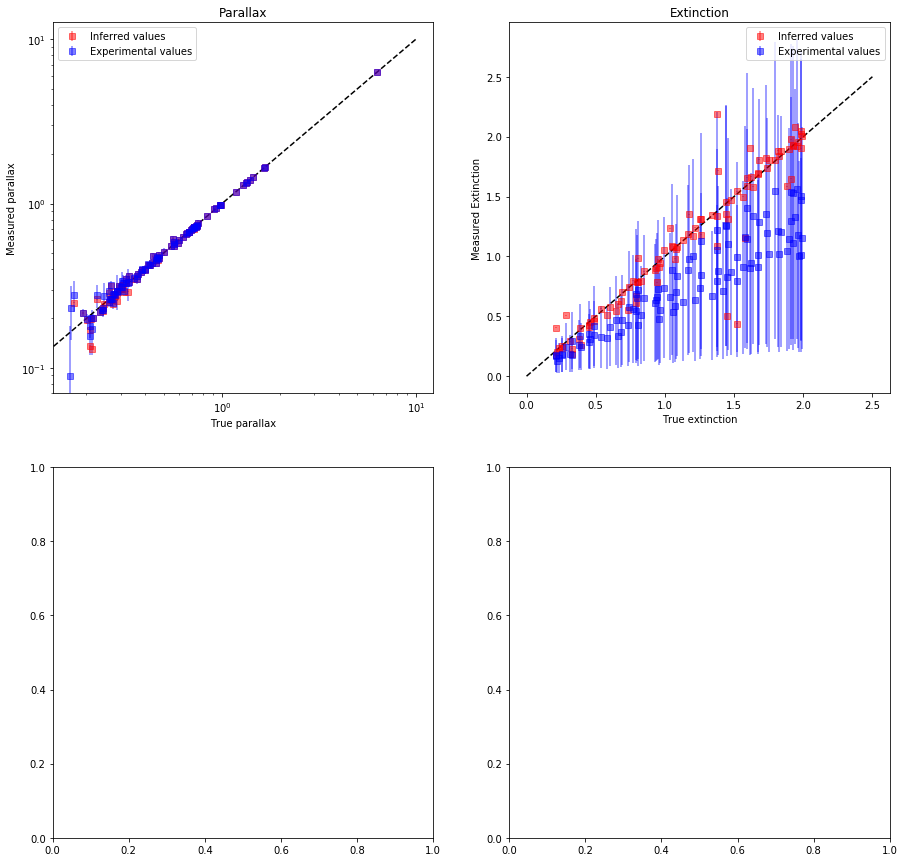

In [307]:
# Let's plot some comparisons on a 2x2 figure!
fig, ax = plt.subplots(2, 2, figsize=(15, 15))

# Parallax

# Calculate lower and upper bounds, also set any NaNs to 0
inf_error = np.array([np.array(data['omega_inf'] - data['omega_inf_l']),
                      np.array(data['omega_inf_u'] - data['omega_inf'])])
inf_error = np.where(np.isfinite(inf_error), inf_error, 0)


ax[0][0].set_title('Parallax')
ax[0][0].set_xscale("log", nonposx='clip')
ax[0][0].set_yscale("log", nonposy='clip')

ax[0][0].errorbar(data['omega_true'], data['omega_inf'], 
                  yerr=inf_error,
                  fmt='sr', label='Inferred values', alpha=0.5
                 )
ax[0][0].errorbar(data['omega_true'], data['omega_exp'], 
                  yerr=data['omega_sigma'],
                  fmt='sb', label='Experimental values', alpha=0.5
                 )
ax[0][0].plot([0, 10], [0, 10], 'k--')
ax[0][0].set_xlabel('True parallax')
ax[0][0].set_ylabel('Measured parallax')
ax[0][0].legend()


# Parallax
inf_error = np.array([np.array(data['A_inf'] - data['A_inf_l']),
                      np.array(data['A_inf_u'] - data['A_inf'])])
inf_error = np.where(np.isfinite(inf_error), inf_error, 0)

ax[0][1].set_title('Extinction')
ax[0][1].errorbar(data['A_true'], data['A_inf'], 
                  yerr=inf_error,
                  fmt='sr', label='Inferred values', alpha=0.5
                 )
ax[0][1].errorbar(data['A_true'], data['A_exp'], 
                  yerr=data['A_sigma'],
                  fmt='sb', label='Experimental values', alpha=0.5
                 )
ax[0][1].plot([0, 2.5], [0, 2.5], 'k--')
ax[0][1].set_xlabel('True extinction')
ax[0][1].set_ylabel('Measured Extinction')
ax[0][1].legend()



plt.show()




In [303]:
np.where(np.isfinite(inf_error), inf_error, 0)

array([[0.0024995 , 0.00242948, 0.00232746, 0.00253512, 0.00247062,
        0.00246114, 0.00222773, 0.00244778, 0.00237021, 0.00241919,
        0.00232135, 0.00250472, 0.00229501, 0.00239298, 0.00246509,
        0.00229455, 0.00228915, 0.00244869, 0.00220031, 0.00234895,
        0.00223518, 0.00253617, 0.00234948, 0.00213198, 0.00253849,
        0.00238922, 0.00237451, 0.00245809, 0.00238954, 0.00239831,
        0.00219874, 0.00217213, 0.0024172 , 0.        , 0.00248402,
        0.00228771, 0.00259713, 0.00244552, 0.00238843, 0.00229674,
        0.00239413, 0.00244876, 0.00242476, 0.00233957, 0.00233196,
        0.00252322, 0.00250716, 0.00225098, 0.00237457, 0.0023455 ,
        0.0022903 , 0.00238427, 0.00247462, 0.00237423, 0.00237395,
        0.00221067, 0.00245542, 0.00237729, 0.00252391, 0.00231022,
        0.00238263, 0.00248497, 0.00219678, 0.00224162, 0.00234384,
        0.00238684, 0.00227232, 0.00242469, 0.00252411, 0.0024257 ,
        0.00249985, 0.00236345, 0.        , 0.00

In [301]:
inf_error

array([[0.0024995 , 0.00242948, 0.00232746, 0.00253512, 0.00247062,
        0.00246114, 0.00222773, 0.00244778, 0.00237021, 0.00241919,
        0.00232135, 0.00250472, 0.00229501, 0.00239298, 0.00246509,
        0.00229455, 0.00228915, 0.00244869, 0.00220031, 0.00234895,
        0.00223518, 0.00253617, 0.00234948, 0.00213198, 0.00253849,
        0.00238922, 0.00237451, 0.00245809, 0.00238954, 0.00239831,
        0.00219874, 0.00217213, 0.0024172 ,        nan, 0.00248402,
        0.00228771, 0.00259713, 0.00244552, 0.00238843, 0.00229674,
        0.00239413, 0.00244876, 0.00242476, 0.00233957, 0.00233196,
        0.00252322, 0.00250716, 0.00225098, 0.00237457, 0.0023455 ,
        0.0022903 , 0.00238427, 0.00247462, 0.00237423, 0.00237395,
        0.00221067, 0.00245542, 0.00237729, 0.00252391, 0.00231022,
        0.00238263, 0.00248497, 0.00219678, 0.00224162, 0.00234384,
        0.00238684, 0.00227232, 0.00242469, 0.00252411, 0.0024257 ,
        0.00249985, 0.00236345,        nan, 0.00

# Deprecated code

## From the maximisation function

In [380]:
def maximise_likelihood(star, data, omega_0, L):
    """Maximises a given star's likelihood in order to find a good initial 
    guess at its parameters.
    
    Currently, this takes omega, omega_0, L, m and M values as given, and only 
    fits for A. This has, in the past, stopped the minimisation function
    from being a colossal prick
    
    If the function fails for whatever reason (usually because it can't stop 
    getting -np.inf for a given star,) then success will be set to False and 
    the star will not be added to the parameters to solve for. If this happens, 
    then the user should really try and work out why (and get the star working)
    before proceeding, to ensure that selection effects stemming from the
    effectiveness of this guesser do not appear in the final model.
    """
    # Assume we're gonna get through ok
    success = True
    
    # A synthetic ranges dictionary to trick posterior() into working
    ranges = {'omega':0,
              'omega_0':1,
              'L':2,
              'A':list(range(3, 3 + 1*N_bands)),
              'm':list(range(3 + 1*N_bands, 3 + 2*N_bands)),
              'M':list(range(3 + 2*N_bands, 3 + 3*N_bands))}
    
    # Set any -ve parallaxes to the PLR implied parallax
    if data['omega_exp'][a_star] <= 0:
        omega = np.power(10, (data['M_exp'][a_star] + data['A_exp'][a_star] 
                                  + 10 - data['m_exp'][a_star]) / 5)
    else:
        omega = data['omega_exp'][a_star]
    
    # Create other guess parameters
    A = data['A_exp'][a_star]
    m = data['m_exp'][a_star]
    M = data['M_exp'][a_star]   
    
    """Check for likelihood_app_mag infinity issues"""
    guess = np.array([omega, omega_0, L, A, m, M])
    likelihood_test = likelihood_app_mag(guess, ranges, data, debug=False)
    if np.isfinite(likelihood_test) == False or likelihood_test < -300:
        print("Star {} gives an instant inf. Attempting to fix.".format(star))
        
        # Slowly change the extinction to see if this fixes the problem
        counter = 1
        while True:
            guess[ranges['A']] += 0.001  
            
            new_likelihood_test = likelihood_app_mag(guess, ranges, data, 
                                                     debug=False)
            
            # If the extinction prior is now false, then I guess we've
            # totally failed to fix this star. =(
            if np.isfinite(prior_extinction(guess, ranges, 
                                            debug=False)) == False:
                print("Prior_extinction is now infinite. Star {} has failed\n"
                      .format(star)
                      + " after {} attempts.".format(counter))
                success = False
                break            
                
            # Otherwise, see if the likelihood is better now:
            elif (np.isfinite(new_likelihood_test) and new_likelihood_test < likelihood_test):
                print("likelihood_app_mag is now finite. Moving on...")
                guess[ranges['A']] -= 0.001  
                break
                
            # Otherwise, update a counter and try the loop again
            else:
                likelihood_test = new_likelihood_test
                counter += 1
                
    """Run scipy minimisation function"""
    if success:
        print("Minimising star {}...".format(star))

        # Remove omega_0, L, m and M from guess so that they're locked
        guess = np.array([omega, A])

        # Multiply the posterior by -1 when returning so that it's 
        # minimized, not maximized
        def function_to_minimize(params, omega_0, L, m, M, ranges, data):
            params = np.insert(params, 1, [omega_0, L])
            params = np.append(params, m)
            params = np.append(params, M)
            return -1 * posterior(params, ranges, data)

        # Actually do the scipy bit
        result = minimize(function_to_minimize, guess, 
                 args=(omega_0, L, m, M, ranges, data), 
                 method='Nelder-Mead',
                 options={'maxiter':2000})

        # 'result' is a scipy.optimize.OptimizeResult object that we need 
        # to split up
        omega = result.x[ranges['omega']]
        A = result.x[list(np.array(ranges['A']) - 2)]
        success = result.success
        
        a_posterior = -1 * function_to_minimize([omega, A], omega_0, 
                            L, m, M, ranges, data)
        
        if success and np.isfinite(a_posterior):
            print("  minimised star {}. Posterior = {}. Omega = {}. A = {}\n"
                  .format(star, a_posterior, omega, A))
        else:
            print("Minimisation failed on star {} after ??? iterations =(\n"
                  .format(star))
    
    return [success, omega, A, m, M]